# **IMPORTING LIBRARY**

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **IPORTING DATASET**

In [25]:
df=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


# **SLICING FOR TRAINING**

In [26]:
ts = df.iloc[:, 1:2].values

# **FEATURE SCALING**

In [27]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range = (0, 1))
ts_scaled = mms.fit_transform(ts)

# **CREATING NEW DATASET WITH 60 TIMESTEPS AND ONE OUTPUT**

In [28]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(ts_scaled[i-60:i, 0])
    y_train.append(ts_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# **RESHAPING DATASET**

In [29]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# **IMPORTING LIBRARIES**

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# **INITIALISING RNN**

In [31]:
regressor = Sequential()

# **ADDING THE FIRST LSTM LAYER AND SOME DROPOUT REGULARISATION**

In [32]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# **ADDING THE SECOND LSTM LAYER AND SOME DROPOUT REGULARISATION**

In [33]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# **ADDING THE THIRD LSTM LAYER AND SOME DROPOUT REGULARISATION**

In [34]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# **ADDING THE FOURTH LSTM LAYER AND SOME DROPOUT REGULARISATION**

In [35]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# **ADDING THE OUTPUT LAYER**

In [36]:
regressor.add(Dense(units = 1))

# **COMPILING THR RNN**

In [37]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# **FITTING THE RNN TO THE TRAINING SET**

In [38]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 15s 122ms/step - loss: 0.0084
Epoch 2/100
62/62 [==============================] - 8s 123ms/step - loss: 0.0035
Epoch 3/100
62/62 [==============================] - 8s 124ms/step - loss: 0.0029
Epoch 4/100
62/62 [==============================] - 8s 127ms/step - loss: 0.0030
Epoch 5/100
62/62 [==============================] - 8s 126ms/step - loss: 0.0027
Epoch 6/100
62/62 [==============================] - 8s 128ms/step - loss: 0.0021
Epoch 7/100
62/62 [==============================] - 8s 126ms/step - loss: 0.0023
Epoch 8/100
62/62 [==============================] - 8s 131ms/step - loss: 0.0022
Epoch 9/100
62/62 [==============================] - 8s 125ms/step - loss: 0.0024
Epoch 10/100
62/62 [==============================] - 8s 127ms/step - loss: 0.0020
Epoch 11/100
62/62 [==============================] - 8s 128ms/step - loss: 0.0019
Epoch 12/100
62/62 [==============================] - 8s 125ms/step - loss: 0.0017
Epoch 13/100

# **AGAIN IMPORTING DATASET**

In [39]:
df1 = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

# **GETTING THE REALSTOCK PRICE FOR THE YEAR 2017**

In [40]:
real_stock_price = df1.iloc[:, 1:2].values

# **EXTRACTING THE PREDICTED PRICE FOR THE YEAR 2017**

In [41]:
dataset_total = pd.concat((df1['Open'], df1['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(df1) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = mms.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = mms.inverse_transform(predicted_stock_price)

# **VISUALING THE RESULT**

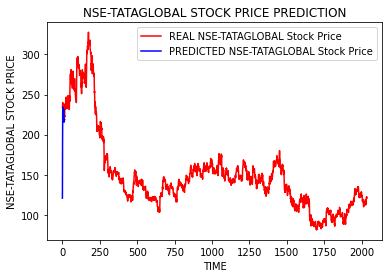

In [42]:
plt.plot(real_stock_price, color = 'red', label = 'REAL NSE-TATAGLOBAL Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'PREDICTED NSE-TATAGLOBAL Stock Price')
plt.title('NSE-TATAGLOBAL STOCK PRICE PREDICTION')
plt.xlabel('TIME')
plt.ylabel('NSE-TATAGLOBAL STOCK PRICE')
plt.legend()
plt.show()